In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats
import statsmodels.api as sm

df1 = pd.read_csv("ABgroup.csv")
df2 = pd.read_csv("Cash.csv")
df3 = pd.read_csv("Money.csv")
df4 = pd.read_csv("Cheaters.csv")
df5 = pd.read_csv("Platforms.csv")

df1.user_id.nunique()

1080000

In [2]:
df_pays = df2.merge(df3, how = 'left')
df_pays = df_pays.groupby(['user_id']).sum()

df_search = df4.loc[df4['cheaters'] > 0]
df_search = df_search.groupby(['user_id']).sum()
df_search.loc[df_search['cheaters'] == 8]

df4 = df4.loc[df4['cheaters'] == 0]
df4 = df4.groupby(['user_id']).sum()

filter_cheaters = df4.index

In [3]:
plats_num = []
for i in df5['platform']:
    if i == 'XBox':
        plats_num.append(1)
    elif i == 'PC':
        plats_num.append(2)
    else:
        plats_num.append(3)

In [4]:
df5['platform_num'] = plats_num

In [5]:
df5 = df5.groupby(['user_id']).sum()
df5.loc[(df5['platform_num'] != 8) & (df5['platform_num'] != 16) & (df5['platform_num'] != 24)]

,platform_num
user_id,


In [6]:
df5 = df5.loc[df5.index.isin(filter_cheaters)]

filter_xbox = df5.loc[df5['platform_num'] == 8]
filter_xbox = filter_xbox.index
filter_pc = df5.loc[df5['platform_num'] == 16]
filter_pc = filter_pc.index
filter_ps4 = df5.loc[df5['platform_num'] == 24]
filter_ps4 = filter_ps4.index

In [7]:
def filters(column = 'test', filtering = filter_xbox):
    df1_t = df1.loc[df1['group'] == column]
    df1_test = df1_t.groupby(['user_id'])
    df1_test = df1_test.first()
    filter_ = df1_test.loc[df1_test.index.isin(filtering)]
    filter_ = filter_.index
    return filter_

In [8]:
fil_t_xbox = filters(column = 'test', filtering = filter_xbox)
fil_t_pc = filters(column = 'test', filtering = filter_pc)
fil_t_ps4 = filters(column = 'test', filtering = filter_ps4)
fil_c_xbox = filters(column = 'control', filtering = filter_xbox)
fil_c_pc = filters(column = 'control', filtering = filter_pc)
fil_c_ps4 = filters(column = 'control', filtering = filter_ps4)

In [9]:
def new_frames(filters = fil_t_xbox):
    n_frame = df_pays.loc[df_pays.index.isin(filters)]
    return n_frame

In [10]:
df_t_xbox = new_frames(filters = fil_t_xbox)
df_t_pc = new_frames(filters = fil_t_pc)
df_t_ps4 = new_frames(filters = fil_t_ps4)
df_c_xbox = new_frames(filters = fil_c_xbox)
df_c_pc = new_frames(filters = fil_c_pc)
df_c_ps4 = new_frames(filters = fil_c_ps4)

In [11]:
def research_func(df = df_t_xbox, x = 'test/xbox'):
    print('Базовые метрики для ', x)
    print()
    print(round(df.describe(), 2))
    print('------------------------------------')
    
    print('Эксцесс ', kurtosis(df))
    print('Ассиметрия ', skew(df))

In [12]:
research_func(df = df_c_ps4, x = 'control/ps4')

Базовые метрики для  control/ps4

            cash      money
count  179804.00  179804.00
mean     5681.94       5.74
std      1334.39       1.87
min        50.00       0.00
25%      4800.00       3.98
50%      5700.00       5.95
75%      6600.00       6.95
max     11600.00      14.92
------------------------------------
Эксцесс  [-0.01246346 -0.03658337]
Ассиметрия  [-0.00971302  0.21783101]


C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'cash')

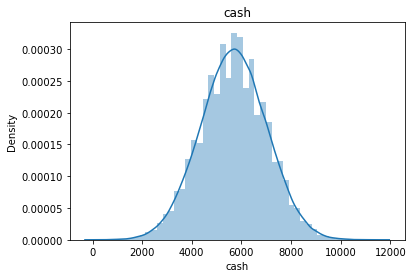

In [13]:
sns.distplot(df_c_ps4['cash'])
plt.title('cash')

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '99 квантиль (красный)')

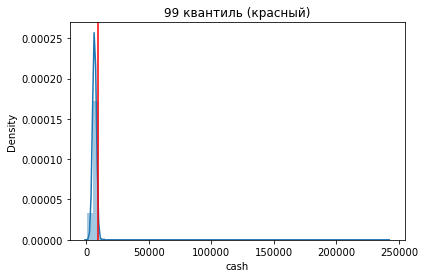

In [14]:
level_99 = np.percentile(df_t_pc, 99)

sns.distplot(df_t_pc['cash'])
plt.axvline(x=level_99, color="r", linestyle="-")
plt.title('99 квантиль (красный)')

In [15]:
new_cheaters_test = df_t_pc[df_t_pc['cash'] > np.percentile(df_t_pc['cash'], 99)]

In [16]:
df_t_pc = df_t_pc.drop(new_cheaters_test.index, axis = 0)

C:\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


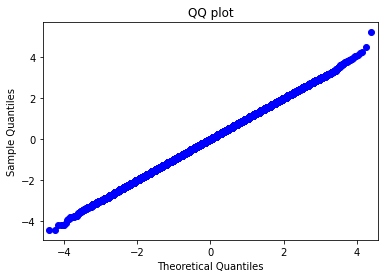

In [17]:
sm.qqplot(df_t_ps4['cash'], fit = True)
plt.title("QQ plot")
plt.show()

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '99 квантиль (красный)')

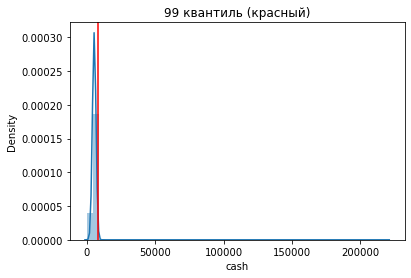

In [18]:
level_99 = np.percentile(df_c_pc, 99)

sns.distplot(df_c_pc['cash'])
plt.axvline(x=level_99, color="r", linestyle="-")
plt.title('99 квантиль (красный)')

In [19]:
new_cheaters_control = df_c_pc[df_c_pc['cash'] > np.percentile(df_c_pc['cash'], 99)]

In [20]:
df_c_pc = df_c_pc.drop(new_cheaters_control.index, axis = 0)

In [21]:
def arpu(df = df_t_xbox):
    x = round(df['money'].sum() / df['money'].count(), 3)
    return x

In [22]:
arpu_t_xbox = arpu() # 6.133
arpu_t_pc = arpu(df = df_t_pc) # 6.234
arpu_t_ps4 = arpu(df = df_t_ps4) # 6.085
arpu_c_xbox = arpu(df = df_c_xbox) # 6.104
arpu_c_pc = arpu(df = df_c_pc) # 5.617
arpu_c_ps4 = arpu(df = df_c_ps4) # 5.738

In [23]:
def arppu(df = df_t_xbox):
    y = round(df['money'].sum() / df.query('money != 0')['money'].count(), 3)
    return y

In [24]:
arppu_t_xbox = arppu() # 6.134
arppu_t_pc = arppu(df = df_t_pc) # 6.235
arppu_t_ps4 = arppu(df = df_t_ps4) # 6.086
arppu_c_xbox = arppu(df = df_c_xbox) # 6.104
arppu_c_pc = arppu(df = df_c_pc) # 5.62
arppu_c_ps4 = arppu(df = df_c_ps4) # 5.739

In [25]:
mean_t_xbox = round(df_t_xbox['cash'].mean(), 2) # 6176.4
mean_t_pc = round(df_t_pc['cash'].mean(), 2) # 6346.51
mean_t_ps4 = round(df_t_ps4['cash'].mean(), 2) # 6130.4
mean_c_xbox = round(df_c_xbox['cash'].mean(), 2) # 6131.79
mean_c_pc = round(df_c_pc['cash'].mean(), 2) # 5557.57
mean_c_ps4 = round(df_c_ps4['cash'].mean(), 2) # 5681.94

In [26]:
def my_norm_confidence(df = df_t_xbox, column = 'cash'):
    alpha = 0.95
    interval = stats.norm.interval(alpha, loc = df[column].mean(), scale = df[column].std())
    return interval

In [27]:
def basic_reaserch(df = df_t_xbox, column = 'cash'):
    print(round(df[column].loc[(df[column] > confidence[1]) |
                               (df[column] < confidence[0])].count() / df[column].count() * 100, 2), '% аномалий по метрике')
    df[column].plot(figsize = (14, 7))
    plt.axhline(y = confidence[1], color="g", linestyle="-")
    plt.axhline(y = confidence[0], color="r", linestyle="-")
    plt.title('Доверительный интервал')

5.82 % аномалий по метрике


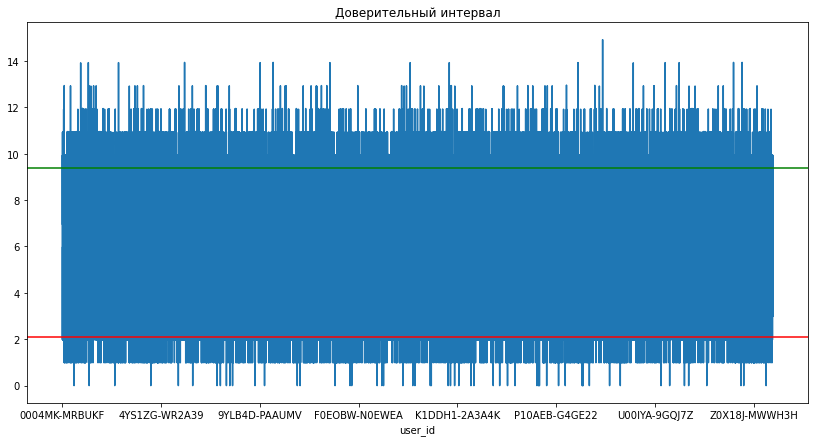

In [28]:
confidence = my_norm_confidence(df = df_c_ps4, column = 'money')
basic_reaserch(df = df_c_ps4, column = 'money')

In [29]:
cash = pd.read_csv("Cash.csv")
money = pd.read_csv("Money.csv")

df_cm = pd.merge(cash, money, on = ['user_id', 'date'])
df_cm

,user_id,date,cash,money
0,GGLSXL-U5BGGY,17.07.2021,200,0.00
1,DPWFFN-NL3VF8,16.07.2021,150,0.99
2,PASNNG-GVW4RR,11.07.2021,1100,0.99
3,4F0AW7-F40GY9,15.07.2021,1050,0.99
4,CEY6AF-YTSM4V,15.07.2021,150,0.99
...,...,...,...,...
8639995,OWJZJH-CNSFHZ,17.07.2021,3150,2.99
8639996,A6ZAWD-VD21JU,15.07.2021,200,0.00
8639997,L9NUIR-HM22U9,15.07.2021,200,0.00
8639998,0A5AY6-NB4ZIS,15.07.2021,200,0.99


In [30]:
ABgroup = df1.groupby(['user_id'])
df_cm = df_cm.merge(ABgroup.first(), on = 'user_id')
df_cm

,user_id,date,cash,money,group
0,GGLSXL-U5BGGY,17.07.2021,200,0.00,control
1,GGLSXL-U5BGGY,11.07.2021,450,0.00,control
2,GGLSXL-U5BGGY,13.07.2021,100,0.99,control
3,GGLSXL-U5BGGY,15.07.2021,1600,0.99,control
4,GGLSXL-U5BGGY,10.07.2021,1450,0.99,control
...,...,...,...,...,...
8639995,L060U3-V5GD7V,10.07.2021,1100,0.99,test
8639996,L060U3-V5GD7V,15.07.2021,0,0.00,test
8639997,L060U3-V5GD7V,12.07.2021,1500,0.99,test
8639998,L060U3-V5GD7V,17.07.2021,500,0.00,test


In [31]:
Platform = pd.read_csv("Platforms.csv")
Platform = Platform.groupby(['user_id'])

In [32]:
df_cm = df_cm.merge(Platform.first(), on = 'user_id')
df_BI = df_cm.set_index('user_id')

In [33]:
fil_BI = df_t_xbox.merge(df_t_pc, how = 'outer', on = ['user_id', 'cash', 'money'])
fil_BI = fil_BI.merge(df_t_ps4, how = 'outer', on = ['user_id', 'cash', 'money'])
fil_BI = fil_BI.merge(df_c_xbox, how = 'outer', on = ['user_id', 'cash', 'money'])
fil_BI = fil_BI.merge(df_c_pc, how = 'outer', on = ['user_id', 'cash', 'money'])
fil_BI = fil_BI.merge(df_c_ps4, how = 'outer', on = ['user_id', 'cash', 'money'])

In [34]:
fil_BI = fil_BI.index
fil_BI

Index(['000Y97-TS8SCA', '00110R-7KB5YJ', '001KO4-TM7NT3', '0020I7-N4Z2TX',
       '0024E3-EJ8QDG', '002CEX-TOQF8H', '003B79-EY7CL8', '004VDE-TCMPTN',
       '0050RB-U68K8F', '005BGK-Y0WALG',
       ...
       'ZZWUNT-1OSO1E', 'ZZY3WL-E8KKM3', 'ZZYCU5-44BKF4', 'ZZYM07-1GI4S1',
       'ZZYV21-MZ2180', 'ZZZ2G7-CG05CT', 'ZZZ8PP-DTMHBH', 'ZZZL1P-5DBOHS',
       'ZZZNBN-SJROHK', 'ZZZV9K-NM9B4Z'],
      dtype='object', name='user_id', length=1076141)

In [35]:
df_BI = df_BI.loc[df_BI.index.isin(fil_BI)]

In [75]:
df_BI.to_csv('DS_final_powerbi.csv')